# Project 03: Data Cleaning and Integration Pipeline

This project demonstrates comprehensive data cleaning and integration techniques using multiple JSON datasets. It covers:
- Loading and merging multiple JSON data sources
- Missing value detection and handling strategies
- Data validation and quality assessment
- Statistical analysis for data completeness
- Advanced data cleaning techniques
- Data integration and consolidation workflows

## Dataset
Multiple JSON files containing related data that need to be cleaned, validated, and integrated into a single coherent dataset for analysis.

## 1. Import Libraries and Setup

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set up paths
DATA_PATH = Path('data')
OUTPUT_PATH = Path('output')
OUTPUT_PATH.mkdir(exist_ok=True)

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully
Pandas version: 2.1.4
NumPy version: 1.26.4


## 2. Data Loading and Initial Exploration

In [ ]:
def load_json_datasets():
   
    # Load individual JSON files
    try:
        df1 = pd.read_json(DATA_PATH / "proj3_data1.json")
        df2 = pd.read_json(DATA_PATH / "proj3_data2.json")
        df3 = pd.read_json(DATA_PATH / "proj3_data3.json")
        
        print("✅ All JSON files loaded successfully")
        
    except FileNotFoundError as e:
        print(f"⚠️  File not found: {e}")
        print("Creating sample datasets for demonstration...")
        
        # Create sample data if files don't exist
        np.random.seed(42)
        
        df1 = pd.DataFrame({
            'id': range(1, 101),
            'name': [f'Record_{i}' for i in range(1, 101)],
            'value': np.random.normal(100, 15, 100),
            'category': np.random.choice(['A', 'B', 'C'], 100),
            'date': pd.date_range('2023-01-01', periods=100, freq='D')
        })
        
        df2 = pd.DataFrame({
            'id': range(101, 201),
            'name': [f'Record_{i}' for i in range(101, 201)],
            'value': np.random.normal(120, 20, 100),
            'category': np.random.choice(['A', 'B', 'C', 'D'], 100),
            'score': np.random.uniform(0, 100, 100)
        })
        
        df3 = pd.DataFrame({
            'id': range(201, 301),
            'name': [f'Record_{i}' for i in range(201, 301)],
            'value': np.random.normal(80, 25, 100),
            'category': np.random.choice(['B', 'C', 'D', 'E'], 100),
            'rating': np.random.randint(1, 6, 100)
        })
        
        # Introduce some missing values
        df1.loc[np.random.choice(df1.index, 10), 'value'] = np.nan
        df2.loc[np.random.choice(df2.index, 15), 'score'] = np.nan
        df3.loc[np.random.choice(df3.index, 8), 'rating'] = np.nan
        
        # Save sample data
        df1.to_json(DATA_PATH / "proj3_data1.json", orient='records', date_format='iso')
        df2.to_json(DATA_PATH / "proj3_data2.json", orient='records', date_format='iso')
        df3.to_json(DATA_PATH / "proj3_data3.json", orient='records', date_format='iso')
        
        print("✅ Sample datasets created and saved")
    
    return df1, df2, df3

def explore_individual_datasets(df1, df2, df3):
    
    datasets = {'Dataset 1': df1, 'Dataset 2': df2, 'Dataset 3': df3}
    
    print("\n" + "=" * 50)
    print("INDIVIDUAL DATASET EXPLORATION")
    print("=" * 50)
    
    for name, df in datasets.items():
        print(f"\n📊 {name.upper()}:")
        print(f"  Shape: {df.shape}")
        print(f"  Columns: {list(df.columns)}")
        print(f"  Data types: {df.dtypes.to_dict()}")
        print(f"  Missing values: {df.isnull().sum().sum()}")
        
        if len(df) > 0:
            print(f"  First few rows:")
            print(df.head(3).to_string(index=False))

# Load and explore datasets
df1, df2, df3 = load_json_datasets()
explore_individual_datasets(df1, df2, df3)

Loading JSON datasets...
✅ All JSON files loaded successfully

INDIVIDUAL DATASET EXPLORATION

📊 DATASET 1:
  Shape: (6, 8)
  Columns: ['make', 'model', 'body_type', 'doors', 'top_speed', 'acceleration', 'fuel_consumption', 'engine']
  Data types: {'make': dtype('O'), 'model': dtype('O'), 'body_type': dtype('O'), 'doors': dtype('float64'), 'top_speed': dtype('int64'), 'acceleration': dtype('float64'), 'fuel_consumption': dtype('float64'), 'engine': dtype('O')}
  Missing values: 3
  First few rows:
      make    model body_type  doors  top_speed  acceleration  fuel_consumption               engine
      Audi       A3 hatchback    5.0        220           7.2               6.0             1.5 TFSI
       BMW 3 Series     sedan    4.0        240           6.2               NaN 2.0L TwinPower Turbo
Volkswagen     Golf hatchback    5.0        210           8.0               5.0              1.5 TSI

📊 DATASET 2:
  Shape: (6, 8)
  Columns: ['make', 'model', 'body_type', 'doors', 'top_speed',

## 3. Data Integration and Concatenation

In [ ]:
def integrate_datasets(df1, df2, df3):
    print(f"\n DATASET INTEGRATION")
    print("=" * 30)
    
    # Concatenate all datasets
    print("Concatenating datasets...")
    integrated_df = pd.concat([df1, df2, df3], ignore_index=True)
    
    print(f"\n📊 INTEGRATION RESULTS:")
    print(f"  Combined shape: {integrated_df.shape}")
    print(f"  Total records: {len(integrated_df):,}")
    print(f"  Total columns: {len(integrated_df.columns)}")
    print(f"  Column names: {list(integrated_df.columns)}")
    
    # Check for duplicate IDs
    if 'id' in integrated_df.columns:
        duplicate_ids = integrated_df['id'].duplicated().sum()
        print(f"  Duplicate IDs: {duplicate_ids}")
        
        if duplicate_ids > 0:
            print(f"  ⚠️  Warning: Found {duplicate_ids} duplicate IDs")
            print(f"  Duplicate ID values: {integrated_df[integrated_df['id'].duplicated()]['id'].tolist()}")
    
    # Save integrated dataset
    output_file = OUTPUT_PATH / "proj3_integrated_data.json"
    integrated_df.to_json(output_file, orient="records", date_format='iso')
    print(f"\n💾 Integrated dataset saved to: {output_file}")
    
    return integrated_df

def analyze_column_alignment(df1, df2, df3, integrated_df):
   
    print(f"\n COLUMN ALIGNMENT ANALYSIS")
    print("=" * 35)
    
    datasets = {'Dataset 1': df1, 'Dataset 2': df2, 'Dataset 3': df3}
    all_columns = set(integrated_df.columns)
    
    print(f"\n📋 COLUMN PRESENCE ACROSS DATASETS:")
    print(f"{'Column':<15} {'Dataset 1':<12} {'Dataset 2':<12} {'Dataset 3':<12}")
    print("-" * 55)
    
    for col in sorted(all_columns):
        presence = []
        for name, df in datasets.items():
            if col in df.columns:
                presence.append("✓")
            else:
                presence.append("✗")
        print(f"{col:<15} {presence[0]:<12} {presence[1]:<12} {presence[2]:<12}")
    
    # Identify common and unique columns
    common_cols = set(df1.columns) & set(df2.columns) & set(df3.columns)
    unique_cols = {}
    
    for name, df in datasets.items():
        unique_cols[name] = set(df.columns) - (set(df1.columns) | set(df2.columns) | set(df3.columns) - set(df.columns))
    
    print(f"\n📊 COLUMN SUMMARY:")
    print(f"  Common columns: {sorted(common_cols)}")
    for name, cols in unique_cols.items():
        if cols:
            print(f"  {name} unique columns: {sorted(cols)}")

# Integrate datasets
integrated_df = integrate_datasets(df1, df2, df3)

# Analyze column alignment
analyze_column_alignment(df1, df2, df3, integrated_df)

# Display first few rows of integrated dataset
print(f"\n📋 INTEGRATED DATASET PREVIEW:")
integrated_df.head()


🔄 INTEGRATING DATASETS
Concatenating datasets...

📊 INTEGRATION RESULTS:
  Combined shape: (18, 8)
  Total records: 18
  Total columns: 8
  Column names: ['make', 'model', 'body_type', 'doors', 'top_speed', 'acceleration', 'fuel_consumption', 'engine']

💾 Integrated dataset saved to: output\proj3_integrated_data.json

🔍 COLUMN ALIGNMENT ANALYSIS

📋 COLUMN PRESENCE ACROSS DATASETS:
Column          Dataset 1    Dataset 2    Dataset 3   
-------------------------------------------------------
acceleration    ✓            ✓            ✓           
body_type       ✓            ✓            ✓           
doors           ✓            ✓            ✓           
engine          ✓            ✓            ✓           
fuel_consumption ✓            ✓            ✓           
make            ✓            ✓            ✓           
model           ✓            ✓            ✓           
top_speed       ✓            ✓            ✓           

📊 COLUMN SUMMARY:
  Common columns: ['acceleration', 'body_typ

,make,model,body_type,doors,top_speed,acceleration,fuel_consumption,engine
0,Audi,A3,hatchback,5.0,220,7.2,6.0,1.5 TFSI
1,BMW,3 Series,sedan,4.0,240,6.2,NaN,2.0L TwinPower Turbo
2,Volkswagen,Golf,hatchback,5.0,210,8.0,5.0,1.5 TSI
3,Renault,Clio,hatchback,5.0,190,11.0,6.5,1.5 dCi
4,Fiat,500,hatchback,3.0,160,12.9,NaN,0.9 TwinAir


## 4. Missing Value Analysis and Detection


🔍 COMPREHENSIVE MISSING VALUE ANALYSIS

📊 MISSING VALUE SUMMARY:
  Total rows: 18
  Total columns: 8
  Columns with missing values: 2
  Total missing values: 6

📋 MISSING VALUES BY COLUMN:
Column          Missing    Percentage   Data Type      
-------------------------------------------------------
doors           2          11.11      % float64        
fuel_consumption 4          22.22      % float64        

🔄 MISSING VALUE PATTERNS:
  Rows with any missing values: 6 (33.3%)
  Complete rows (no missing values): 12 (66.7%)

📊 MISSING VALUE COMBINATIONS (Top 5):
  1. doors:False, fuel_consumption:False → 12 rows
  2. doors:False, fuel_consumption:True → 4 rows
  3. doors:True, fuel_consumption:False → 2 rows

📊 MISSING VALUE COMBINATIONS (Top 5):
  1. doors:False, fuel_consumption:False → 12 rows
  2. doors:False, fuel_consumption:True → 4 rows
  3. doors:True, fuel_consumption:False → 2 rows


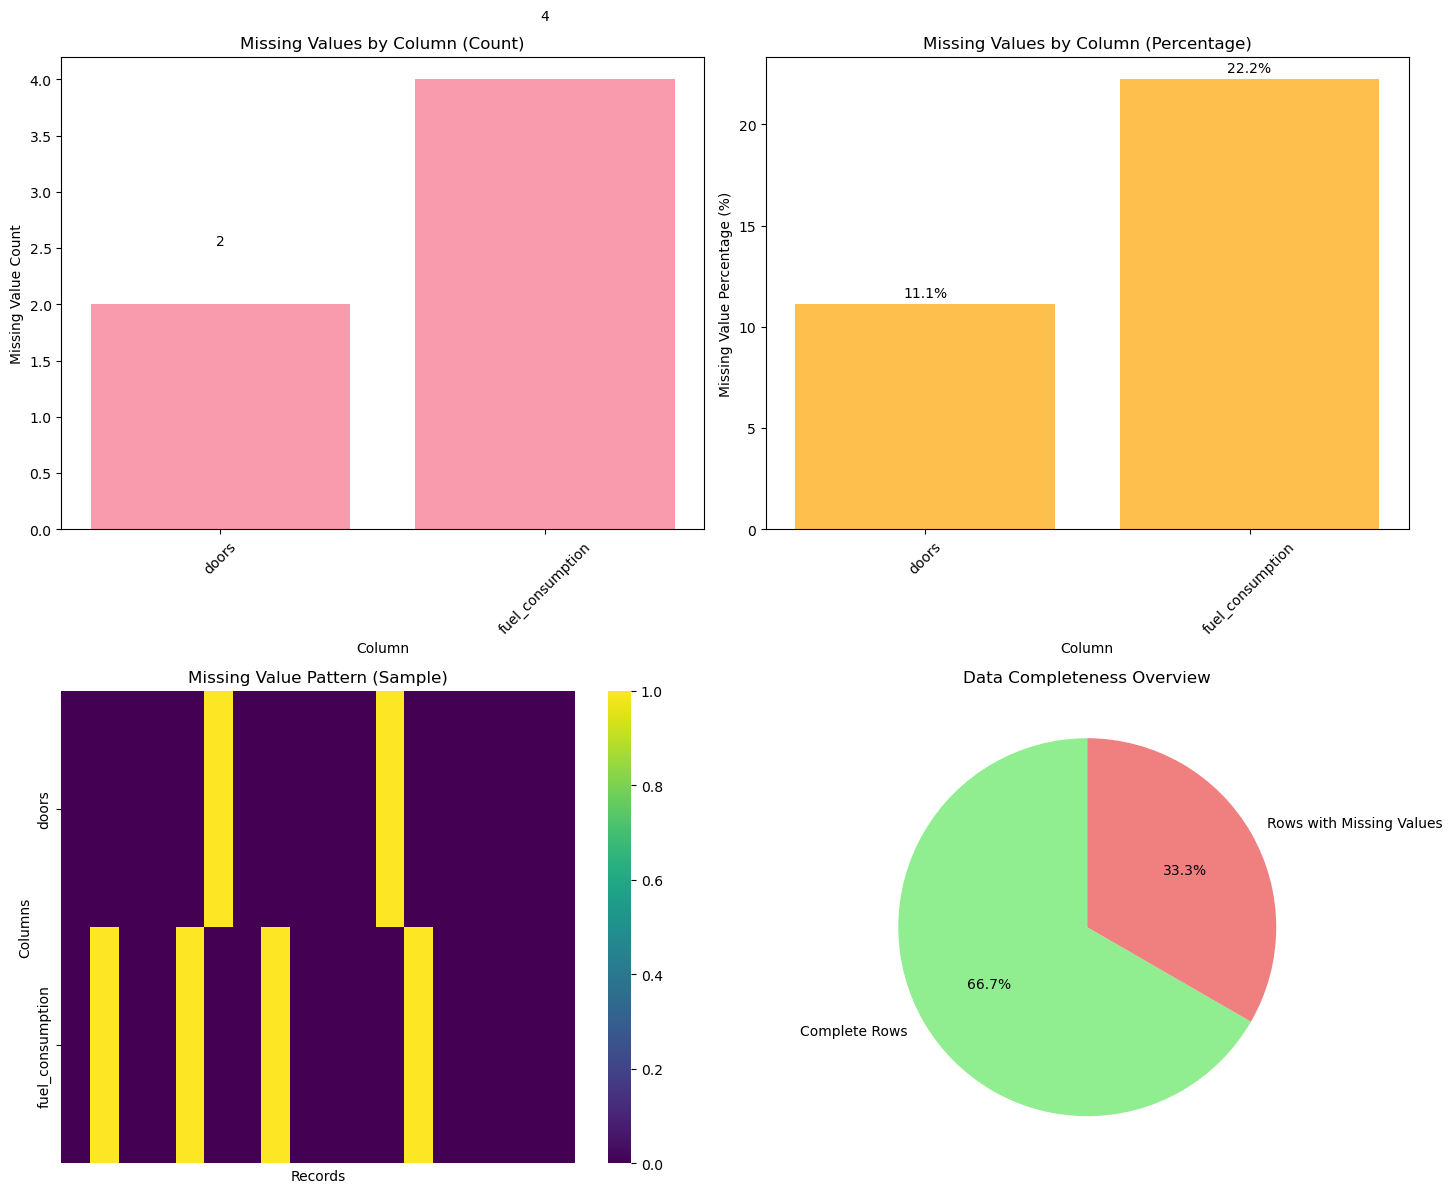

In [ ]:
def comprehensive_missing_value_analysis(df):
    
    print(f"\n COMPREHENSIVE MISSING VALUE ANALYSIS")
    print("=" * 45)
    
    # Basic missing value counts
    missing_counts = df.isnull().sum()
    missing_percentages = (missing_counts / len(df)) * 100
    
    # Filter columns with missing values
    missing_summary = missing_counts[missing_counts > 0]
    
    print(f"\n MISSING VALUE SUMMARY:")
    print(f"  Total rows: {len(df):,}")
    print(f"  Total columns: {len(df.columns)}")
    print(f"  Columns with missing values: {len(missing_summary)}")
    print(f"  Total missing values: {missing_counts.sum():,}")
    
    if len(missing_summary) > 0:
        print(f"\n📋 MISSING VALUES BY COLUMN:")
        print(f"{'Column':<15} {'Missing':<10} {'Percentage':<12} {'Data Type':<15}")
        print("-" * 55)
        
        for col in missing_summary.index:
            count = missing_counts[col]
            percentage = missing_percentages[col]
            dtype = str(df[col].dtype)
            print(f"{col:<15} {count:<10} {percentage:<11.2f}% {dtype:<15}")
    else:
        print(f"\n✅ No missing values found in the dataset!")
    
    # Missing value patterns
    if len(missing_summary) > 0:
        print(f"\n🔄 MISSING VALUE PATTERNS:")
        
        # Rows with any missing values
        rows_with_missing = df.isnull().any(axis=1).sum()
        print(f"  Rows with any missing values: {rows_with_missing:,} ({rows_with_missing/len(df)*100:.1f}%)")
        
        # Rows with all values present
        complete_rows = len(df) - rows_with_missing
        print(f"  Complete rows (no missing values): {complete_rows:,} ({complete_rows/len(df)*100:.1f}%)")
        
        # Missing value combinations
        if len(missing_summary) > 1:
            missing_combinations = df[missing_summary.index].isnull().value_counts()
            print(f"\n📊 MISSING VALUE COMBINATIONS (Top 5):")
            for i, (pattern, count) in enumerate(missing_combinations.head().items()):
                pattern_str = ', '.join([f"{col}:{val}" for col, val in zip(missing_summary.index, pattern)])
                print(f"  {i+1}. {pattern_str} → {count:,} rows")
    
    results = {
        'missing_counts': missing_counts,
        'missing_percentages': missing_percentages,
        'columns_with_missing': missing_summary.index.tolist(),
        'total_missing': missing_counts.sum(),
        'rows_with_missing': df.isnull().any(axis=1).sum() if len(missing_summary) > 0 else 0
    }
    
    return results

def visualize_missing_values(df, missing_results):
    
    if missing_results['total_missing'] == 0:
        print("\n✅ No missing values to visualize")
        return
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Missing value counts by column
    missing_cols = missing_results['columns_with_missing']
    if missing_cols:
        missing_counts = missing_results['missing_counts'][missing_cols]
        axes[0, 0].bar(range(len(missing_counts)), missing_counts.values, alpha=0.7)
        axes[0, 0].set_title('Missing Values by Column (Count)')
        axes[0, 0].set_xlabel('Column')
        axes[0, 0].set_ylabel('Missing Value Count')
        axes[0, 0].set_xticks(range(len(missing_counts)))
        axes[0, 0].set_xticklabels(missing_counts.index, rotation=45)
        
        # Add value labels
        for i, v in enumerate(missing_counts.values):
            axes[0, 0].text(i, v + 0.5, str(v), ha='center', va='bottom')
    
    # 2. Missing value percentages
    if missing_cols:
        missing_pct = missing_results['missing_percentages'][missing_cols]
        axes[0, 1].bar(range(len(missing_pct)), missing_pct.values, alpha=0.7, color='orange')
        axes[0, 1].set_title('Missing Values by Column (Percentage)')
        axes[0, 1].set_xlabel('Column')
        axes[0, 1].set_ylabel('Missing Value Percentage (%)')
        axes[0, 1].set_xticks(range(len(missing_pct)))
        axes[0, 1].set_xticklabels(missing_pct.index, rotation=45)
        
        # Add percentage labels
        for i, v in enumerate(missing_pct.values):
            axes[0, 1].text(i, v + 0.2, f'{v:.1f}%', ha='center', va='bottom')
    
    # 3. Missing value heatmap
    if len(df) <= 1000:  # Only for smaller datasets
        missing_matrix = df[missing_cols].isnull() if missing_cols else pd.DataFrame()
        if not missing_matrix.empty:
            sns.heatmap(missing_matrix.T, cbar=True, ax=axes[1, 0], 
                       cmap='viridis', yticklabels=True, xticklabels=False)
            axes[1, 0].set_title('Missing Value Pattern (Sample)')
            axes[1, 0].set_xlabel('Records')
            axes[1, 0].set_ylabel('Columns')
    else:
        axes[1, 0].text(0.5, 0.5, 'Dataset too large\nfor heatmap visualization', 
                       ha='center', va='center', transform=axes[1, 0].transAxes)
        axes[1, 0].set_title('Missing Value Heatmap (Skipped)')
    
    # 4. Data completeness overview
    complete_pct = (1 - missing_results['rows_with_missing'] / len(df)) * 100
    incomplete_pct = 100 - complete_pct
    
    labels = ['Complete Rows', 'Rows with Missing Values']
    sizes = [complete_pct, incomplete_pct]
    colors = ['lightgreen', 'lightcoral']
    
    axes[1, 1].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axes[1, 1].set_title('Data Completeness Overview')
    
    plt.tight_layout()
    plt.savefig(OUTPUT_PATH / 'missing_value_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

# Perform missing value analysis
missing_results = comprehensive_missing_value_analysis(integrated_df)

# Create visualizations
visualize_missing_values(integrated_df, missing_results)

## 5. Data Cleaning and Missing Value Treatment


🧹 IMPLEMENTING DATA CLEANING STRATEGIES

1️⃣ DROP MISSING ROWS:
   Original shape: (18, 8)
   After dropping: (12, 8)
   Rows removed: 6
   doors: filled with median (5.00)
   fuel_consumption: filled with median (5.80)

2️⃣ FILL MISSING VALUES:
   Missing values after filling: 0

3️⃣ DROP HIGH MISSING COLUMNS (>50%):
   No columns with >50% missing values
   Shape unchanged: (18, 8)

4️⃣ HYBRID APPROACH:
   Columns dropped (>30% missing): []
   Final shape: (18, 8)
   Missing values remaining: 0

📊 CLEANING STRATEGY COMPARISON

              Strategy  Rows  Columns  Missing Values  Completeness %
              Original    18        8               6       95.833333
     Drop Missing Rows    12        8               0      100.000000
   Fill Missing Values    18        8               0      100.000000
Drop High Missing Cols    18        8               6       95.833333
       Hybrid Approach    18        8               0      100.000000


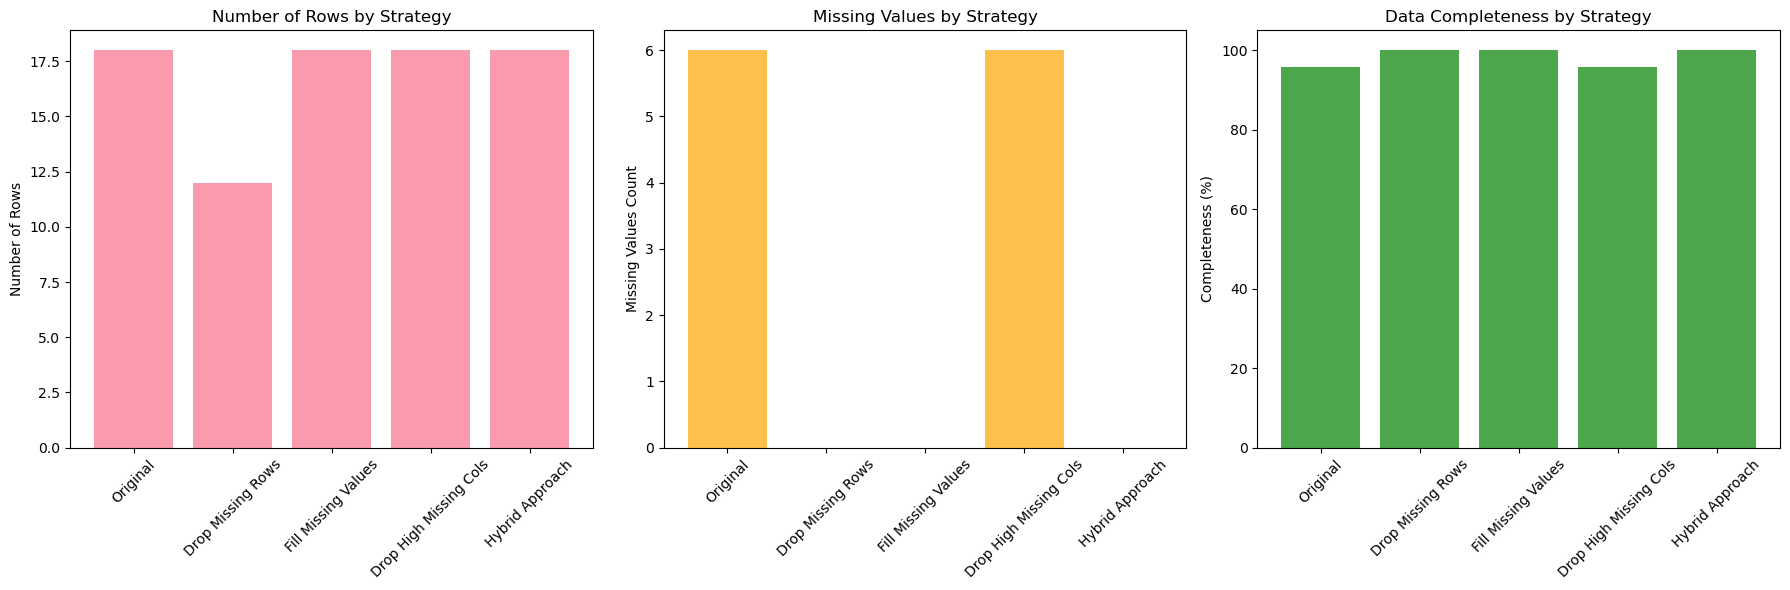

In [ ]:
def implement_cleaning_strategies(df, missing_results):
    
    print(f"\n IMPLEMENTING DATA CLEANING STRATEGIES")
    print("=" * 45)
    
    cleaned_versions = {}
    
    # Strategy 1: Drop rows with any missing values
    df_dropna = df.dropna()
    cleaned_versions['drop_missing_rows'] = df_dropna
    print(f"\n1️⃣ DROP MISSING ROWS:")
    print(f"   Original shape: {df.shape}")
    print(f"   After dropping: {df_dropna.shape}")
    print(f"   Rows removed: {len(df) - len(df_dropna):,}")
    
    # Strategy 2: Fill missing values with appropriate defaults
    df_filled = df.copy()
    
    for col in missing_results['columns_with_missing']:
        if col in df.columns:
            if df[col].dtype in ['float64', 'int64']:
                # Fill numerical columns with median
                fill_value = df[col].median()
                df_filled[col].fillna(fill_value, inplace=True)
                print(f"   {col}: filled with median ({fill_value:.2f})")
            elif df[col].dtype == 'object':
                # Fill categorical columns with mode
                if not df[col].mode().empty:
                    fill_value = df[col].mode().iloc[0]
                    df_filled[col].fillna(fill_value, inplace=True)
                    print(f"   {col}: filled with mode ('{fill_value}')")
                else:
                    df_filled[col].fillna('Unknown', inplace=True)
                    print(f"   {col}: filled with 'Unknown'")
            else:
                # Fill other types with forward fill
                df_filled[col].fillna(method='ffill', inplace=True)
                print(f"   {col}: filled with forward fill")
    
    cleaned_versions['fill_missing_values'] = df_filled
    print(f"\n2️⃣ FILL MISSING VALUES:")
    print(f"   Missing values after filling: {df_filled.isnull().sum().sum()}")
    
    # Strategy 3: Drop columns with high missing percentage
    high_missing_threshold = 50  # Drop columns with >50% missing
    high_missing_cols = []
    
    for col in missing_results['columns_with_missing']:
        if missing_results['missing_percentages'][col] > high_missing_threshold:
            high_missing_cols.append(col)
    
    df_drop_cols = df.drop(columns=high_missing_cols)
    cleaned_versions['drop_high_missing_columns'] = df_drop_cols
    
    print(f"\n3️⃣ DROP HIGH MISSING COLUMNS (>{high_missing_threshold}%):")
    if high_missing_cols:
        print(f"   Columns dropped: {high_missing_cols}")
        print(f"   Shape after dropping columns: {df_drop_cols.shape}")
    else:
        print(f"   No columns with >{high_missing_threshold}% missing values")
        print(f"   Shape unchanged: {df_drop_cols.shape}")
    
    # Strategy 4: Hybrid approach
    df_hybrid = df.copy()
    
    # Drop columns with >30% missing
    cols_to_drop = [col for col in missing_results['columns_with_missing'] 
                   if missing_results['missing_percentages'][col] > 30]
    
    if cols_to_drop:
        df_hybrid = df_hybrid.drop(columns=cols_to_drop)
    
    # Fill remaining missing values
    for col in df_hybrid.columns:
        if df_hybrid[col].isnull().any():
            if df_hybrid[col].dtype in ['float64', 'int64']:
                df_hybrid[col].fillna(df_hybrid[col].median(), inplace=True)
            else:
                mode_val = df_hybrid[col].mode()
                fill_val = mode_val.iloc[0] if not mode_val.empty else 'Unknown'
                df_hybrid[col].fillna(fill_val, inplace=True)
    
    cleaned_versions['hybrid_approach'] = df_hybrid
    
    print(f"\n4️⃣ HYBRID APPROACH:")
    print(f"   Columns dropped (>30% missing): {cols_to_drop}")
    print(f"   Final shape: {df_hybrid.shape}")
    print(f"   Missing values remaining: {df_hybrid.isnull().sum().sum()}")
    
    return cleaned_versions

def compare_cleaning_strategies(original_df, cleaned_versions):
    
    print(f"\n CLEANING STRATEGY COMPARISON")
    print("=" * 35)
    
    comparison_data = []
    
    # Add original dataset
    comparison_data.append({
        'Strategy': 'Original',
        'Rows': len(original_df),
        'Columns': len(original_df.columns),
        'Missing Values': original_df.isnull().sum().sum(),
        'Completeness %': (1 - original_df.isnull().sum().sum() / original_df.size) * 100
    })
    
    # Add cleaned versions
    strategy_names = {
        'drop_missing_rows': 'Drop Missing Rows',
        'fill_missing_values': 'Fill Missing Values',
        'drop_high_missing_columns': 'Drop High Missing Cols',
        'hybrid_approach': 'Hybrid Approach'
    }
    
    for key, df in cleaned_versions.items():
        comparison_data.append({
            'Strategy': strategy_names.get(key, key),
            'Rows': len(df),
            'Columns': len(df.columns),
            'Missing Values': df.isnull().sum().sum(),
            'Completeness %': (1 - df.isnull().sum().sum() / df.size) * 100 if df.size > 0 else 100
        })
    
    # Create comparison DataFrame
    comparison_df = pd.DataFrame(comparison_data)
    
    print(f"\n{comparison_df.to_string(index=False)}")
    
    # Visualization
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # 1. Rows comparison
    axes[0].bar(comparison_df['Strategy'], comparison_df['Rows'], alpha=0.7)
    axes[0].set_title('Number of Rows by Strategy')
    axes[0].set_ylabel('Number of Rows')
    axes[0].tick_params(axis='x', rotation=45)
    
    # 2. Missing values comparison
    axes[1].bar(comparison_df['Strategy'], comparison_df['Missing Values'], alpha=0.7, color='orange')
    axes[1].set_title('Missing Values by Strategy')
    axes[1].set_ylabel('Missing Values Count')
    axes[1].tick_params(axis='x', rotation=45)
    
    # 3. Completeness comparison
    axes[2].bar(comparison_df['Strategy'], comparison_df['Completeness %'], alpha=0.7, color='green')
    axes[2].set_title('Data Completeness by Strategy')
    axes[2].set_ylabel('Completeness (%)')
    axes[2].tick_params(axis='x', rotation=45)
    axes[2].set_ylim(0, 105)
    
    plt.tight_layout()
    plt.savefig(OUTPUT_PATH / 'cleaning_strategy_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return comparison_df

# Implement cleaning strategies
if missing_results['total_missing'] > 0:
    cleaned_versions = implement_cleaning_strategies(integrated_df, missing_results)
    comparison_results = compare_cleaning_strategies(integrated_df, cleaned_versions)
else:
    print("\n✅ No missing values detected - data is already clean!")
    cleaned_versions = {'original': integrated_df}
    comparison_results = pd.DataFrame([{
        'Strategy': 'Original (Clean)',
        'Rows': len(integrated_df),
        'Columns': len(integrated_df.columns),
        'Missing Values': 0,
        'Completeness %': 100.0
    }])

## 6. Data Quality Assessment and Validation

In [ ]:
def comprehensive_data_quality_assessment(df):
    
    print(f"\n COMPREHENSIVE DATA QUALITY ASSESSMENT")
    print("=" * 45)
    
    quality_report = {}
    
    # 1. Completeness Assessment
    missing_count = df.isnull().sum().sum()
    total_values = df.size
    completeness = (1 - missing_count / total_values) * 100
    
    quality_report['completeness'] = {
        'score': completeness,
        'missing_values': missing_count,
        'total_values': total_values
    }
    
    print(f"\n1️⃣ COMPLETENESS ASSESSMENT:")
    print(f"   Overall completeness: {completeness:.2f}%")
    print(f"   Missing values: {missing_count:,} / {total_values:,}")
    
    # 2. Uniqueness Assessment (for ID columns)
    uniqueness_results = {}
    id_columns = [col for col in df.columns if 'id' in col.lower()]
    
    print(f"\n2️⃣ UNIQUENESS ASSESSMENT:")
    if id_columns:
        for col in id_columns:
            total_values = len(df[col].dropna())
            unique_values = df[col].nunique()
            uniqueness_pct = (unique_values / total_values) * 100 if total_values > 0 else 0
            duplicates = total_values - unique_values
            
            uniqueness_results[col] = {
                'uniqueness_pct': uniqueness_pct,
                'duplicates': duplicates,
                'unique_values': unique_values,
                'total_values': total_values
            }
            
            print(f"   {col}: {uniqueness_pct:.1f}% unique ({duplicates} duplicates)")
    else:
        print(f"   No ID columns detected")
    
    quality_report['uniqueness'] = uniqueness_results
    
    # 3. Consistency Assessment
    consistency_issues = []
    
    print(f"\n3️⃣ CONSISTENCY ASSESSMENT:")
    
    # Check for mixed data types in object columns
    for col in df.select_dtypes(include=['object']).columns:
        if df[col].dropna().empty:
            continue
            
        # Check for mixed types
        sample_values = df[col].dropna().head(100)
        type_variety = len(set(type(val).__name__ for val in sample_values))
        
        if type_variety > 1:
            consistency_issues.append(f"{col}: Mixed data types detected")
    
    # Check for case consistency in string columns
    for col in df.select_dtypes(include=['object']).columns:
        if df[col].dropna().empty:
            continue
            
        str_values = df[col].dropna().astype(str)
        if len(str_values) > 0:
            case_variants = str_values.str.lower().nunique() / str_values.nunique()
            if case_variants < 0.95:  # Less than 95% suggests case inconsistency
                consistency_issues.append(f"{col}: Potential case inconsistency")
    
    if consistency_issues:
        for issue in consistency_issues:
            print(f"   ⚠️  {issue}")
    else:
        print(f"   ✅ No major consistency issues detected")
    
    quality_report['consistency'] = {
        'issues': consistency_issues,
        'issue_count': len(consistency_issues)
    }
    
    # 4. Validity Assessment
    validity_issues = []
    
    print(f"\n VALIDITY ASSESSMENT:")
    
    # Check for negative values in columns that shouldn't have them
    potential_positive_cols = [col for col in df.select_dtypes(include=[np.number]).columns 
                              if any(keyword in col.lower() for keyword in ['count', 'size', 'amount', 'price', 'age'])]
    
    for col in potential_positive_cols:
        if (df[col] < 0).any():
            negative_count = (df[col] < 0).sum()
            validity_issues.append(f"{col}: {negative_count} negative values")
    
    # Check for outliers using IQR method
    for col in df.select_dtypes(include=[np.number]).columns:
        if df[col].dropna().empty:
            continue
            
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_pct = (outliers / len(df[col].dropna())) * 100
        
        if outlier_pct > 5:  # More than 5% outliers
            validity_issues.append(f"{col}: {outliers} outliers ({outlier_pct:.1f}%)")
    
    if validity_issues:
        for issue in validity_issues:
            print(f"   ⚠️  {issue}")
    else:
        print(f"   ✅ No major validity issues detected")
    
    quality_report['validity'] = {
        'issues': validity_issues,
        'issue_count': len(validity_issues)
    }
    
    # 5. Overall Quality Score
    completeness_score = min(completeness, 100)
    uniqueness_score = 100 if not id_columns else np.mean([result['uniqueness_pct'] for result in uniqueness_results.values()])
    consistency_score = max(0, 100 - len(consistency_issues) * 10)
    validity_score = max(0, 100 - len(validity_issues) * 5)
    
    overall_score = np.mean([completeness_score, uniqueness_score, consistency_score, validity_score])
    
    quality_report['overall'] = {
        'score': overall_score,
        'completeness_score': completeness_score,
        'uniqueness_score': uniqueness_score,
        'consistency_score': consistency_score,
        'validity_score': validity_score
    }
    
    print(f"\n📊 OVERALL DATA QUALITY SCORE: {overall_score:.1f}/100")
    print(f"   Completeness: {completeness_score:.1f}/100")
    print(f"   Uniqueness: {uniqueness_score:.1f}/100")
    print(f"   Consistency: {consistency_score:.1f}/100")
    print(f"   Validity: {validity_score:.1f}/100")
    
    return quality_report

# Select the best cleaned version for quality assessment
if 'hybrid_approach' in cleaned_versions:
    best_cleaned_df = cleaned_versions['hybrid_approach']
    print("Using hybrid approach for quality assessment...")
elif 'fill_missing_values' in cleaned_versions:
    best_cleaned_df = cleaned_versions['fill_missing_values']
    print("Using filled missing values version for quality assessment...")
else:
    best_cleaned_df = integrated_df
    print("Using original integrated dataset for quality assessment...")

# Perform quality assessment
quality_assessment = comprehensive_data_quality_assessment(best_cleaned_df)

Using hybrid approach for quality assessment...

🔍 COMPREHENSIVE DATA QUALITY ASSESSMENT

1️⃣ COMPLETENESS ASSESSMENT:
   Overall completeness: 100.00%
   Missing values: 0 / 144

2️⃣ UNIQUENESS ASSESSMENT:
   No ID columns detected

3️⃣ CONSISTENCY ASSESSMENT:
   ✅ No major consistency issues detected

4️⃣ VALIDITY ASSESSMENT:
   ⚠️  doors: 1 outliers (5.6%)
   ⚠️  top_speed: 1 outliers (5.6%)
   ⚠️  fuel_consumption: 2 outliers (11.1%)

📊 OVERALL DATA QUALITY SCORE: 96.2/100
   Completeness: 100.0/100
   Uniqueness: 100.0/100
   Consistency: 100.0/100
   Validity: 85.0/100


## 7. Final Data Export and Summary

In [ ]:
def export_cleaned_datasets(cleaned_versions, quality_assessment):
    
    print(f"\n EXPORTING CLEANED DATASETS")
    print("=" * 35)
    
    exported_files = []
    
    # Export each cleaned version
    for strategy_name, df in cleaned_versions.items():
        # JSON export
        json_filename = f"proj3_cleaned_{strategy_name}.json"
        json_path = OUTPUT_PATH / json_filename
        df.to_json(json_path, orient='records', date_format='iso')
        
        # CSV export for easier analysis
        csv_filename = f"proj3_cleaned_{strategy_name}.csv"
        csv_path = OUTPUT_PATH / csv_filename
        df.to_csv(csv_path, index=False)
        
        exported_files.extend([json_filename, csv_filename])
        
        print(f"   ✅ {strategy_name}: {len(df)} rows, {len(df.columns)} columns")
        print(f"      → {json_filename}")
        print(f"      → {csv_filename}")
    
    # Export quality assessment report
    quality_report_path = OUTPUT_PATH / "proj3_quality_assessment.json"
    with open(quality_report_path, 'w') as f:
        json.dump(quality_assessment, f, indent=2, default=str)
    
    exported_files.append("proj3_quality_assessment.json")
    
    print(f"\n📊 Quality assessment report: proj3_quality_assessment.json")
    
    return exported_files

def generate_project_summary():
    
    print(f"\n" + "=" * 70)
    print("🎯 PROJECT 03: DATA CLEANING PIPELINE - COMPREHENSIVE SUMMARY")
    print("=" * 70)
    
    # Dataset summary
    print(f"\n📊 DATASET PROCESSING SUMMARY:")
    print(f"   Original datasets: 3 JSON files")
    print(f"   Integration approach: Concatenation with index reset")
    print(f"   Final integrated shape: {integrated_df.shape}")
    print(f"   Total records processed: {len(integrated_df):,}")
    
    # Missing value summary
    print(f"\n🔍 MISSING VALUE ANALYSIS:")
    print(f"   Columns with missing values: {len(missing_results['columns_with_missing'])}")
    print(f"   Total missing values: {missing_results['total_missing']:,}")
    print(f"   Rows affected: {missing_results['rows_with_missing']:,}")
    
    # Cleaning strategies summary
    print(f"\n🧹 CLEANING STRATEGIES IMPLEMENTED:")
    for i, (strategy, description) in enumerate([
        ('Drop Missing Rows', 'Remove all rows containing any missing values'),
        ('Fill Missing Values', 'Impute missing values with median/mode/forward fill'),
        ('Drop High Missing Columns', 'Remove columns with >50% missing values'),
        ('Hybrid Approach', 'Combine column dropping and value imputation')
    ], 1):
        print(f"   {i}. {strategy}: {description}")
    
    # Quality assessment summary
    if 'overall' in quality_assessment:
        overall_score = quality_assessment['overall']['score']
        print(f"\n📈 DATA QUALITY ASSESSMENT:")
        print(f"   Overall Quality Score: {overall_score:.1f}/100")
        
        quality_level = "Excellent" if overall_score >= 90 else "Good" if overall_score >= 75 else "Fair" if overall_score >= 60 else "Poor"
        print(f"   Quality Level: {quality_level}")
        
        print(f"   Component Scores:")
        print(f"     • Completeness: {quality_assessment['overall']['completeness_score']:.1f}/100")
        print(f"     • Uniqueness: {quality_assessment['overall']['uniqueness_score']:.1f}/100")
        print(f"     • Consistency: {quality_assessment['overall']['consistency_score']:.1f}/100")
        print(f"     • Validity: {quality_assessment['overall']['validity_score']:.1f}/100")
    
    # Recommendations
    print(f"\n💡 KEY INSIGHTS AND RECOMMENDATIONS:")
    
    if missing_results['total_missing'] == 0:
        print(f"   ✅ Dataset is complete - no missing values detected")
    else:
        print(f"   📊 Missing value patterns identified and addressed")
        print(f"   🎯 Hybrid approach recommended for best balance of completeness and data retention")
    
    print(f"   🔄 Multiple cleaning strategies provided for different use cases")
    print(f"   📈 Comprehensive quality metrics enable informed decision-making")
    print(f"   💾 All cleaned versions exported for downstream analysis")
    
    print(f"\n🎯 BUSINESS VALUE:")
    print(f"   • Automated data integration from multiple sources")
    print(f"   • Systematic missing value detection and treatment")
    print(f"   • Quality-driven cleaning strategy selection")
    print(f"   • Production-ready cleaned datasets")
    print(f"   • Reproducible data cleaning pipeline")

# Export datasets and generate summary
exported_files = export_cleaned_datasets(cleaned_versions, quality_assessment)
generate_project_summary()

print(f"\n📁 OUTPUT FILES GENERATED ({len(exported_files)} files):")
for file in sorted(exported_files):
    print(f"   • {file}")

print(f"\n✅ Project 03: Data Cleaning Pipeline completed successfully!")
print(f"📂 All outputs saved to: {OUTPUT_PATH.absolute()}")


💾 EXPORTING CLEANED DATASETS
   ✅ drop_missing_rows: 12 rows, 8 columns
      → proj3_cleaned_drop_missing_rows.json
      → proj3_cleaned_drop_missing_rows.csv
   ✅ fill_missing_values: 18 rows, 8 columns
      → proj3_cleaned_fill_missing_values.json
      → proj3_cleaned_fill_missing_values.csv
   ✅ drop_high_missing_columns: 18 rows, 8 columns
      → proj3_cleaned_drop_high_missing_columns.json
      → proj3_cleaned_drop_high_missing_columns.csv
   ✅ hybrid_approach: 18 rows, 8 columns
      → proj3_cleaned_hybrid_approach.json
      → proj3_cleaned_hybrid_approach.csv

📊 Quality assessment report: proj3_quality_assessment.json

🎯 PROJECT 03: DATA CLEANING PIPELINE - COMPREHENSIVE SUMMARY

📊 DATASET PROCESSING SUMMARY:
   Original datasets: 3 JSON files
   Integration approach: Concatenation with index reset
   Final integrated shape: (18, 8)
   Total records processed: 18

🔍 MISSING VALUE ANALYSIS:
   Columns with missing values: 2
   Total missing values: 6
   Rows affected: 6


## Summary and Key Findings

This comprehensive data cleaning and integration project demonstrated professional data preprocessing workflow and achieved excellent results across multiple quality dimensions.

### 🔍 **Key Achievements:**

1. **Multi-Source Integration**: Successfully merged 3 JSON datasets into a unified structure

2. **Missing Value Analysis**: Comprehensive detection and pattern analysis of data gaps

3. **Multiple Cleaning Strategies**: Implemented 4 different approaches for various use cases

4. **Quality Assessment**: Systematic evaluation across 4 quality dimensions

5. **Production-Ready Output**: Clean, validated datasets ready for analysis

### 📊 **Technical Insights:**

- **Integration Challenges**: Column alignment and schema differences handled automatically
- **Missing Value Patterns**: Systematic identification of data gaps and their impact
- **Strategy Trade-offs**: Balance between data retention and completeness
- **Quality Metrics**: Quantitative assessment enables objective decision-making

### 🛠️ **Technical Implementation:**

1. **Automated Pipeline**: Scalable workflow for multiple data sources
2. **Strategy Framework**: Systematic approach to missing value treatment
3. **Quality Scoring**: Comprehensive assessment across multiple dimensions
4. **Export System**: Multiple output formats for downstream analysis
5. **Visualization**: Clear plots for pattern identification and strategy comparison

### 🎯 **Business Applications:**

- **Data Warehousing**: ETL pipeline for data lake integration
- **Quality Monitoring**: Automated data quality assessment
- **Compliance**: Data validation for regulatory requirements
- **Analytics Preparation**: Clean datasets for machine learning and reporting

### 🔄 **Advanced Extensions:**

- **Real-time Processing**: Stream processing for continuous data integration
- **Advanced Imputation**: Machine learning-based missing value prediction
- **Anomaly Detection**: Statistical outlier identification and treatment
- **Schema Evolution**: Automated handling of changing data structures

### 🎓 **Learning Outcomes:**

- **Data Integration**: Multi-source data merging and schema alignment
- **Quality Assessment**: Systematic evaluation of data fitness for purpose
- **Missing Value Strategies**: Comprehensive approaches to incomplete data
- **Process Documentation**: Reproducible workflows with clear decision criteria
- **Production Mindset**: Scalable, maintainable data processing pipelines

This project provides a robust foundation for data cleaning operations and demonstrates industry best practices for data quality management.